In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#defining a basic function( parabolic function )
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
#defining an array
xs = np.arange(-5,5,0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

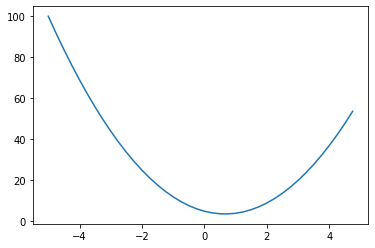

In [5]:
#plotting the basic function f
plt.plot(xs,ys)

Visualizing derivative which basically with intuition means by what value and whether positive and negative the value of y will change when x is just very slightly bumped. This is basically dericative of x and the value of y will change according to slope of the graph of the function.

In [6]:
x = 3.0
f(x)

20.0

In [7]:
h = 0.001
x = 3.0
f(x + h)

20.014003000000002

In [8]:
(f(x + h) - f(x))/h

14.00300000000243

In [9]:
#at -3.0 the change or the slope will be negative
h = 0.0001
x = -3.0
(f(x + h) - f(x))/h

-21.999700000066014

In [10]:
#when slope is zero at x = 2/3 even a slight bump will x , value of y remains constant
h = 0.0001
x = 2/3
(f(x+h) - f(x))/h

0.0002999999981767587

In [11]:
#getting more complex example
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [12]:
h = 0.0001

#inputs or the point 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print('d1' , d1)
print('d2' , d2)
print('slope', (d2 - d1) / h)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [13]:
h = 0.0001

#inputs or the point 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c
print('d1' , d1)
print('d2' , d2)
print('slope', (d2 - d1) / h)

#differentiating wrt b will give exactly a so 2

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [14]:
h = 0.0001

#inputs or the point 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c
print('d1' , d1)
print('d2' , d2)
print('slope', (d2 - d1) / h)

#differentiating wrt b will give exactly c so how many change of c will be exactly the change therefore wrt c slope will be 1

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [15]:
class Value:
  def __init__(self,data , _children = () , _op = "" , label = ''):
    self.data = data
    self._prev = set(_children)
    self.grad = 0.0
    self._backward = lambda : None
    self._op = _op
    self.label = label
  
  def __repr__(self):
    return f"Value( data = {self.data})"
  
  def __add__(self , other):
    other = other if isinstance(other, Value) else Value(other) # to make a + 2 work
    out =  Value((self.data + other.data) , (self , other) , '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out
  
  def __neg__(self):
    return self * -1
    
  def __sub__(self ,other):
    return self + (-other)
  
  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out =  Value((self.data * other.data) , (self , other) , '*')
    def _backward():
      self.grad += other.data * out.grad #local derivative * the out.grad(global derivative with respect to the output(or the loss fn))
      other.grad += self.data * out.grad # same - local derivative * the global derivative 
    out._backward = _backward
    return out

  def __rmul__(self , other):
    return self * other
  
  def __pow__(self,other):
    assert isinstance(other , (int , float))
    out = Value(self.data**other , (self,) , f'**{other}')

    def _backward():
      self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward
    return out

  def __truediv__(self,other):
    return self * (other**-1)
  
  def tanh(self):
    t = x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t , (self, ) , 'tanh')#only one children
    def _backward():
      self.grad += (1-t**2) * out.grad
    out._backward = _backward
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x) , (self,) , 'exp')
    
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward 
    return out

  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [16]:
a = Value(3.0)
b = Value(2.0)
a/b # doesn't work right now
#a/b = a * (1/b) = a * (b**-1)
a - b

Value( data = 1.0)

In [17]:
a = Value(2.0)
2 * a

Value( data = 4.0)

In [18]:
a = Value(2.0 , label = 'a')
b = Value(-3.0, label = ' b')
c = Value(10.0, label = ' c')
e = a*b ; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0 , label = 'f')
L = f * d ; L.label = 'L'

In [19]:
L

Value( data = -8.0)

In [20]:
L.label ,L._prev

('L', {Value( data = -2.0), Value( data = 4.0)})

In [21]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

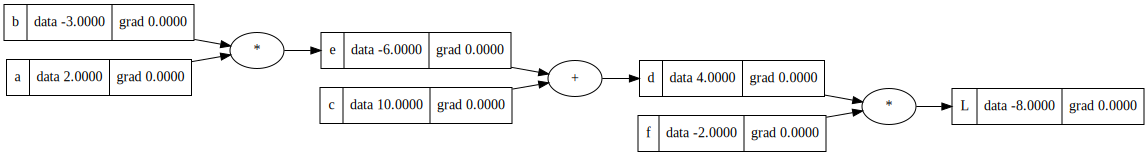

In [22]:
draw_dot(L)

In [23]:
""" performing one single step of computation
    requires nudging the leaf nodes in the direction of their
    gradients.
    We only use the leaf nodes and nudge them only because they
    are the only ones we have control over.In this case the 
    leaf nodes are as follows - a,b,c,f,
    What will hapenn is that in the next forward computation
    using these nudged values , computing the final answer of L will
    result in the UPWARD MOVING OF THE NEGATIVE VALUE OF L.
    This means that Loss of the loss function will decrease. """

#nudging
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#forward computation
e = a * b
d = e + c
L = d * f
print(L.data) #reduced loss

-8.0


In [24]:
b.grad = 2.0 * -2.0

In [25]:
# dL/de = dL/dd * dd/de = d.grad
# d = e + c
# dd/de = 1.0
#local gradient in a massive graph will be will be just c and e computation gives d
#therefore they will be knowing there effects ( dd/ dc) and (dd/ de) on d

In [26]:
def lol():
  h = 0.0001
  a = Value(2.0 , label = 'a')
  b = Value(-3.0, label = ' b')
  c = Value(10.0, label = ' c')
  e = a*b ; e.label = 'e'
  d = e + c ; d.label = 'd'
  f = Value(-2.0 , label = 'f')
  L = f * d ; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label = 'a')
  b = Value(-3.0 + h, label = ' b')
  c = Value(10.0, label = ' c')
  e = a*b ; e.label = 'e'
  d = e + c ; d.label = 'd'
  f = Value(-2.0 , label = 'f')
  L = f * d ; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)


In [27]:
lol()

-4.000000000008441


In [28]:
#inputs
x1 = Value( 2.0, label = 'x1')
x2 = Value( 0.0, label = 'x2')
#weights
w1 = Value( -3.0, label = 'w1')
w2 = Value( 1.0 , label = 'w2')
#bias
b = Value(6.8813735870195432 ,label = 'b')
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b ; n.label = 'n'
o = n.tanh() ; o.label = 'o'


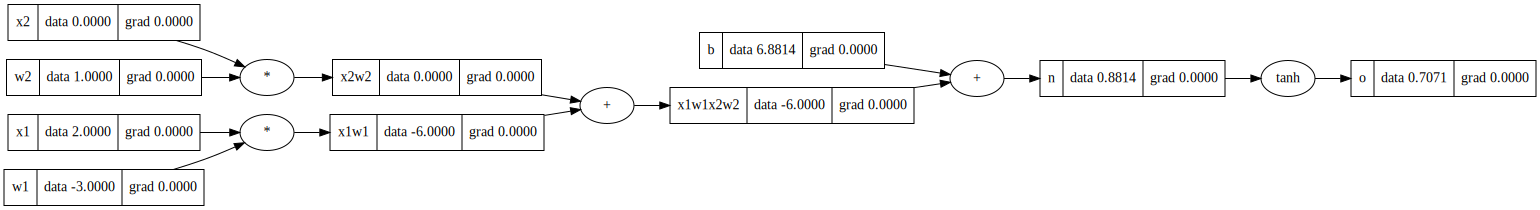

In [29]:
draw_dot(o)

In [30]:
#setting the base case manually
o.grad = 1.0
#then flowing the backpropagations
o._backward()

In [31]:
#then flowing the gradients of n to its two children(x1w1x2w2 and b)
n._backward()

In [32]:
#we can do the b._backward but as its the leaf node therefore it will not have any backward children....so by default the b._backward will 
#be initialized by lambda : NONE (no function)
b._backward()

In [33]:
#similarly for x1w1x2w2
x1w1x2w2._backward()

In [34]:
#for x1w1
x1w1._backward()

In [35]:
#for x2w2
x2w2._backward()

In [36]:
#now the problem is that we are doing all this manually therefore we will define the function to this all automatically
#for this we will lay out the graph nodes such that we will have the forward value means the data of that node computed
#one way to do this is to lay all the graphs in topological order and we do this by topological sort 

# topo = []
# visited = set()
# def build_topo(v):
#   if v not in visited:
#     visited.add(v)
#     for child in v._prev:
#       build_topo(child)
#     topo.append(v)
# build_topo(o)
# topo

In [37]:
#we just need to do this in the reverse order we call the nodes and then set the gradients for each Value object or each node in nn
# o.grad = 1.0
# for node in reversed(topo):
#   node._backward()

In [38]:
""" now we just need to take these above code functions
    and put them in the Value class and define them in 
    the backward function """
#calling out the function
o.backward()

In [39]:
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad

In [40]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [41]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [42]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [43]:
o.grad = 1.0
n.grad = 0.5

In [44]:
1 - (o.data)**2

0.4999999999999999

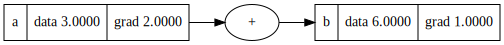

In [45]:
#now there is a bug in this , lets see the bug 
a = Value(3.0 , label = 'a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

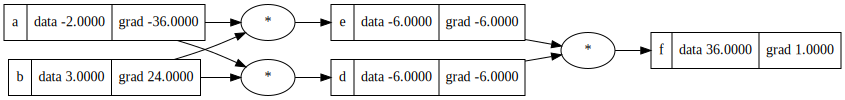

In [46]:
#as we can see above, if we see the derivative of db/da should have been 2 , there is pointer on top of each
#therefore a.grad should have been 2 rather than 1
#Let's see another example of this where our one node is being used multiple times

a = Value(-2.0 , label = 'a')
b = Value(3.0 , label = 'b')
d = a*b ; d.label = 'd'
e = a*b ; e.label = 'e'
f = d*e ; f.label = 'f'
f.backward()
draw_dot(f)


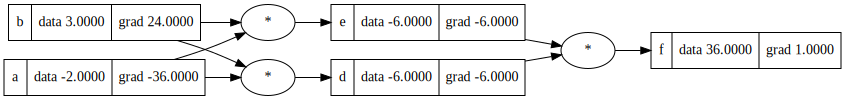

In [47]:
#each node or variable is being used multiple times therefore in the above case it is being overwrited
#therefore in the multivariate case of the chain rule , we should not be setting the gradients 
#but the solution to this is that we should be accumulating the gradients

#.... let's do this in the above class

a = Value(-2.0 , label = 'a')
b = Value(3.0 , label = 'b')
d = a*b ; d.label = 'd'
e = a*b ; e.label = 'e'
f = d*e ; f.label = 'f'
f.backward()
draw_dot(f)

In [48]:
#as we can see as we accumulate the gradients, they are correctly being accumalted in the local grad instead
#of just being overwrited

In [49]:
""" we have opened the tanh function instead of tanh , now we can use exponential form of tanh """
#inputs
x1 = Value( 2.0, label = 'x1')
x2 = Value( 0.0, label = 'x2')
#weights
w1 = Value( -3.0, label = 'w1')
w2 = Value( 1.0 , label = 'w2')
#bias
b = Value(6.8813735870195432 ,label = 'b')
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b ; n.label = 'n'
#-------
e = (2*n).exp()
o = (e - 1)/ (e+ 1)
#-------
#o = n.tanh() ; o.label = 'o'


In [50]:
o.backward()

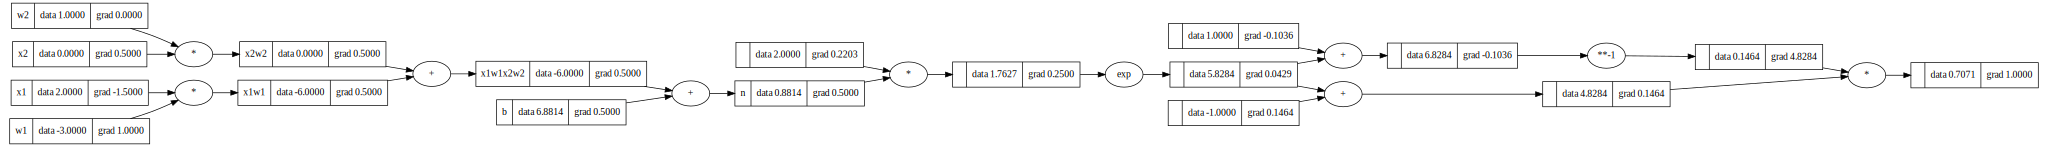

In [51]:
draw_dot(o) #we should be getting the same results as before

In [52]:
#doing the same things by PyTorch
import torch
torch.__version__

'1.13.1+cu116'

In [53]:
x1 = torch.Tensor([2.0]).double()  ; x1.requires_grad = True#by default single precision in python so converting it into double prec.
x2 = torch.Tensor([1.0]).double() ; x2.requires_grad = True #cause leaf nodes , therfore by default PyTorch doesn't require grad in leaf nodes cause of efficiency
w1 = torch.Tensor([-3.0]).double()  ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()  ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
l = torch.tanh(n)
print(l.data.item())
l.backward()

print('------')
print('x1' , x1.grad.item())
print('x2', x2.grad.item())
print('w1' , w1.grad.item())
print('w2' , w2.grad.item())

0.9546141103528835
------
x1 -0.2661357009455185
x2 0.08871190031517284
w1 0.17742380063034568
w2 0.08871190031517284


In [54]:
first = x1*w1

In [55]:
second = x2*w2

In [56]:
torch.tanh((first + second) + b)

tensor([0.9546], dtype=torch.float64, grad_fn=<TanhBackward0>)

Let's Make the PyTorch Library for the Multilayer Perceptron using Classes for Micrograd

In [92]:
import random

class Neuron:
  def __init__(self , nin):
    #nin : number of inputs
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    #w.x + b
    # print(list(zip(self.w , x)))
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  def __init__(self , nin , nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self , x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if(len(outs)) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  def __init__(self , nin, nouts): #nouts is now the list of all the neurons in the layers except input layer
    sz = [nin] + nouts
    self.layers = [Layer(sz[i] , sz[i+1]) for i in range(len(nouts))]

  def __call__(self , x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]



In [96]:
x = [2.0 , 3.0 , -1.0]
n = MLP(3 , [4,4,1])
n(x)

Value( data = 0.7800871807028732)

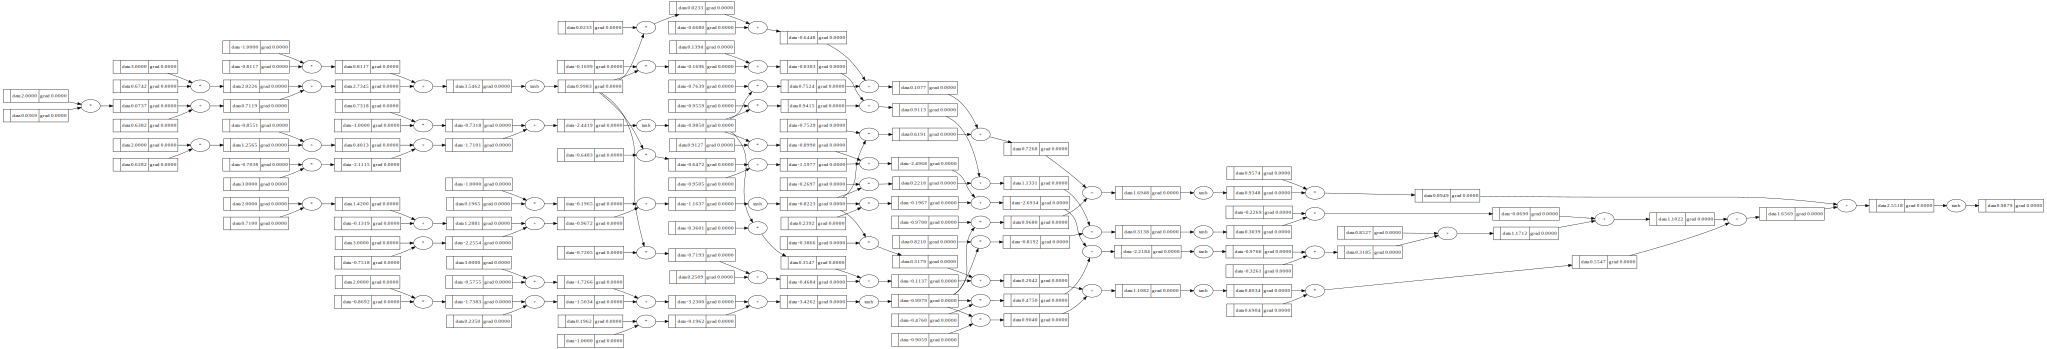

In [72]:
draw_dot(n(x))

In [73]:
#woahhhhhhhhh....self_note : this is magic and so interesting

In [97]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

#binary classification mini problem

In [98]:
ypred = [n(x) for x in xs]
ypred

[Value( data = 0.7800871807028732),
 Value( data = -0.21771486445555177),
 Value( data = 0.12461764901761574),
 Value( data = 0.6734380104506256)]

In [99]:
# # [(x,y) for x,y in zip(ypred, ys)]
# loss = sum[(yout - ygt)**2 for ygt, yout in zip(ys, ypred) , Value(0.0)]
# loss

In [111]:
#training the model

for k in range(20):
  #forward pass
  ypred = [n(x) for x in xs]
  loss = sum(((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) , Value(0.0))

  #backward and before it setting gradients to zero
  for p in n.parameters():
    p.grad = 0
  loss.backward()

  #nudgin the parameters
  for p in n.parameters():
    p.data += -0.05 * p.grad
  
  print(k , loss.data)

0 0.028209198900313204
1 0.026686158594838666
2 0.025310815414184465
3 0.024063165135748694
4 0.022926612382775036
5 0.021887280525574683
6 0.02093348165672641
7 0.020055305138699735
8 0.019244295034497
9 0.01849319490314601
10 0.017795744174753145
11 0.017146514394886507
12 0.016540776560084146
13 0.01597439289988198
14 0.015443728029834828
15 0.01494557556538502
16 0.014477097160040149
17 0.014035771591936513
18 0.013619352026527566
19 0.013225829970118872


In [112]:
ypred #our predictions get so close

[Value( data = 0.9699757362864811),
 Value( data = -0.9544449007576903),
 Value( data = -0.9279783777448452),
 Value( data = 0.9288523196489229)]

In [101]:
# loss = sum(((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) , Value(0.0)) # sum(any value , int(0)) now this will give an error unless you make it sum([] , Value(0.0))
# loss

In [102]:
# loss = sum(((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) , Value(0.0)) # sum(any value , int(0)) now this will give an error unless you make it sum([] , Value(0.0))
# loss

In [89]:
# draw_dot(loss)

In [103]:
# loss.backward()

In [104]:
# n.layers[0].neurons[0].w[0].grad

In [105]:
# n.layers[0].neurons[0].w[0].data

In [106]:
# n.parameters()

In [107]:
# for p in n.parameters():
#   p.data += -0.01 * p.grad

In [108]:
# plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))) ;  plt.grid()